In [58]:
import zipfile
import random
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import geopandas

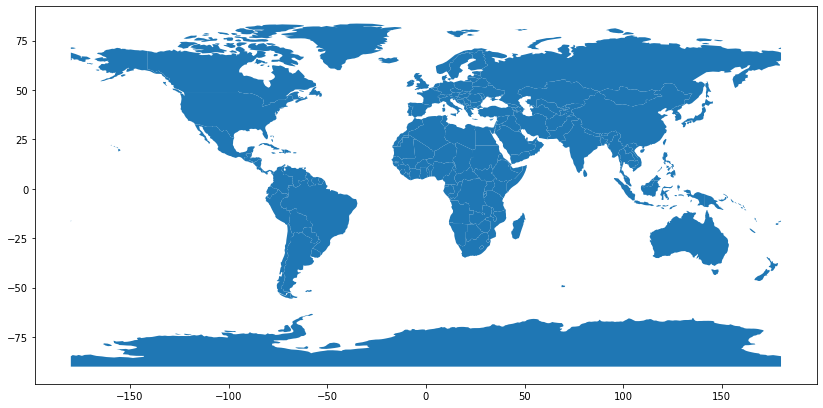

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(14, 8));


# CBS WijkBuurtKaart 2021 v0

In [12]:
!ls WijkBuurtkaart_2021_v0/SHP

CBS_buurten2021.CPG       CBS_gemeenten2021.cpg     CBS_wijken2021.cpg
CBS_buurten2021.dbf       CBS_gemeenten2021.dbf     CBS_wijken2021.dbf
CBS_buurten2021.prj       CBS_gemeenten2021.prj     CBS_wijken2021.prj
CBS_buurten2021.sbn       CBS_gemeenten2021.sbn     CBS_wijken2021.sbn
CBS_buurten2021.sbx       CBS_gemeenten2021.sbx     CBS_wijken2021.sbx
CBS_buurten2021.shp       CBS_gemeenten2021.shp     CBS_wijken2021.shp
CBS_buurten2021.shp.xml   CBS_gemeenten2021.shp.xml CBS_wijken2021.shp.xml
CBS_buurten2021.shx       CBS_gemeenten2021.shx     CBS_wijken2021.shx


# Gemeenten

In [111]:
filename = 'WijkBuurtkaart_2020_v1/gemeente_2020_v1.shp'
# filename = 'WijkBuurtkaart_2021_v0/SHP/CBS_gemeenten2021.shp'
gemeenten = geopandas.read_file(filename);

In [112]:
gemeenten

,GM_CODE,JRSTATCODE,GM_NAAM,H2O,OAD,STED,BEV_DICHTH,AANT_INW,AANT_MAN,AANT_VROUW,...,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,OPP_TOT,OPP_LAND,OPP_WATER,Shape_Leng,Shape_Area,geometry
0,GM0010,2020GM0010,Delfzijl,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,128728.007061,9.129235e+07,"MULTIPOLYGON (((268674.309 592382.331, 268667...."
1,GM0034,2020GM0034,Almere,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,122665.358634,1.095623e+08,"MULTIPOLYGON (((150213.998 479503.726, 150087...."
2,GM0050,2020GM0050,Zeewolde,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,83290.773617,1.633050e+07,"MULTIPOLYGON (((154927.535 474979.290, 154931...."
3,GM0060,2020GM0060,Ameland,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,156406.894023,2.085914e+08,"POLYGON ((196000.000 610000.000, 196000.000 60..."
4,GM0072,2020GM0072,Harlingen,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,104274.683036,3.618323e+08,"MULTIPOLYGON (((158392.775 580357.500, 158387...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,GM1963,2020GM1963,Hoeksche Waard,NEE,825,4,325,87401,43211,44190,...,0,1,0,3,32369,26893,5475,147020.366016,2.818623e+08,"MULTIPOLYGON (((98666.226 412682.437, 98543.00..."
434,GM1966,2020GM1966,Het Hogeland,NEE,410,5,99,47801,24042,23759,...,0,0,0,2,90758,48275,42483,323086.469173,4.878506e+08,"MULTIPOLYGON (((215169.098 595155.688, 215169...."
435,GM1969,2020GM1969,Westerkwartier,NEE,475,5,175,63329,31810,31519,...,0,0,0,2,36887,36269,618,99030.762281,3.688457e+08,"POLYGON ((211363.510 585818.360, 211364.156 58..."
436,GM1970,2020GM1970,Noardeast-Fryslân,NEE,463,5,120,45228,22768,22460,...,0,0,0,2,51645,37783,13862,238426.959616,3.837930e+08,"MULTIPOLYGON (((207521.119 595796.903, 207521...."


<AxesSubplot:>

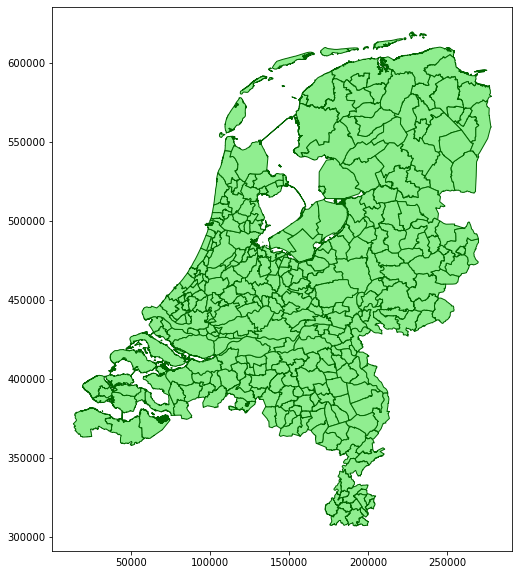

In [107]:
gemeenten[gemeenten['WATER']=='NEE'].plot(figsize=(15, 10), edgecolor='darkgreen', facecolor='lightgreen')

# Wijken

In [129]:
filename = 'WijkBuurtkaart_2020_v1/wijk_2020_v1.shp'
# filename = 'WijkBuurtkaart_2021_v0/SHP/CBS_wijken2021.shp'
wijken = geopandas.read_file(filename);

In [130]:
wijken

,WK_CODE,JRSTATCODE,WK_NAAM,GM_CODE,GM_NAAM,IND_WBI,WATER,OAD,STED,BEV_DICHTH,...,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,OPP_TOT,OPP_LAND,OPP_WATER,Shape_Leng,Shape_Area,geometry
0,WK001099,2020WK001099,None,GM0010,Delfzijl,-99999999,JA,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,128728.007061,9.129235e+07,"MULTIPOLYGON (((268674.309 592382.331, 268667...."
1,WK003499,2020WK003499,None,GM0034,Almere,-99999999,JA,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,122665.358634,1.095623e+08,"MULTIPOLYGON (((150213.998 479503.726, 150087...."
2,WK005099,2020WK005099,None,GM0050,Zeewolde,-99999999,JA,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,83290.773617,1.633050e+07,"MULTIPOLYGON (((154927.535 474979.290, 154931...."
3,WK006099,2020WK006099,None,GM0060,Ameland,-99999999,JA,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,156406.894023,2.085914e+08,"POLYGON ((196000.000 610000.000, 196000.000 60..."
4,WK007299,2020WK007299,None,GM0072,Harlingen,-99999999,JA,-99999999,-99999999,-99999999,...,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,104274.683036,3.618323e+08,"MULTIPOLYGON (((158392.775 580357.500, 158387...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,WK197816,2020WK197816,Wijk16-Oud-Alblas,GM1978,Molenlanden,1,NEE,233,5,173,...,0,0,0,1,1314,1285,30,15386.292051,1.314364e+07,"POLYGON ((106369.839 430274.773, 106369.781 43..."
3256,WK197817,2020WK197817,Wijk17-Schelluinen,GM1978,Molenlanden,1,NEE,169,5,367,...,0,0,0,3,358,351,7,9712.398664,3.579981e+06,"POLYGON ((123049.365 428858.412, 123052.430 42..."
3257,WK197818,2020WK197818,Wijk18-Streefkerk,GM1978,Molenlanden,1,NEE,234,5,163,...,0,0,0,1,1670,1522,148,19976.620798,1.670185e+07,"POLYGON ((109510.118 434350.028, 109472.562 43..."
3258,WK197819,2020WK197819,Wijk19-Waal,GM1978,Molenlanden,1,NEE,50,5,2362,...,-99999999,-99999999,-99999999,-99999999,5,5,0,2380.324142,5.334670e+04,"POLYGON ((121602.900 439121.610, 121602.410 43..."


In [131]:
wijken['GM_NAAM'].unique()

array(['Delfzijl', 'Almere', 'Zeewolde', 'Ameland', 'Harlingen',
       'Schiermonnikoog', 'Terschelling', 'Vlieland', 'Kampen',
       'Noordoostpolder', 'Urk', 'Elburg', 'Ermelo', 'Harderwijk',
       'Nijkerk', 'Oldebroek', 'Putten', 'Nunspeet', 'Dronten',
       'Bunschoten', 'Eemnes', 'Amsterdam', 'Bergen (NH.)', 'Beverwijk',
       'Blaricum', 'Bloemendaal', 'Castricum', 'Diemen', 'Edam-Volendam',
       'Enkhuizen', 'Heemskerk', 'Den Helder', 'Hoorn', 'Huizen',
       'Medemblik', 'Schagen', 'Texel', 'Velsen', 'Zandvoort',
       'Drechterland', 'Dordrecht', "'s-Gravenhage", 'Hellevoetsluis',
       'Stede Broec', 'Katwijk', 'Noordwijk', 'Rotterdam', 'Westvoorne',
       'Wassenaar', 'Borsele', 'Goes', 'Hulst', 'Kapelle', 'Middelburg',
       'Reimerswaal', 'Terneuzen', 'Tholen', 'Veere', 'Vlissingen',
       'Steenbergen', 'Waterland', 'Lelystad', 'Buitenland', 'Koggenland',
       'Schouwen-Duiveland', 'Noord-Beveland', 'Steenwijkerland',
       'Moerdijk', 'Sluis', 'Westland'

# Wijken Haarlemmermeer

In [132]:
wijken_haarlemmermeer = wijken[wijken['GM_NAAM']=='Haarlemmermeer']
print(wijken_haarlemmermeer.shape)
wijken_haarlemmermeer

(18, 40)


,WK_CODE,JRSTATCODE,WK_NAAM,GM_CODE,GM_NAAM,IND_WBI,WATER,OAD,STED,BEV_DICHTH,...,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,OPP_TOT,OPP_LAND,OPP_WATER,Shape_Leng,Shape_Area,geometry
1090,WK039401,2020WK039401,Hoofddorp,GM0394,Haarlemmermeer,1,NEE,1960,2,2142,...,1,4,3,12,3785,3578,206,32789.652121,3.784926e+07,"POLYGON ((102865.805 480073.797, 102870.918 48..."
1091,WK039402,2020WK039402,Nieuw-Vennep,GM0394,Haarlemmermeer,1,NEE,1533,2,939,...,1,3,1,7,3420,3354,66,25897.538541,3.420269e+07,"POLYGON ((103609.050 478681.874, 103642.649 47..."
1092,WK039403,2020WK039403,Zwanenburg,GM0394,Haarlemmermeer,1,NEE,1071,3,1136,...,0,1,1,5,717,695,22,10376.428386,7.167377e+06,"POLYGON ((109656.507 488777.454, 109711.513 48..."
1093,WK039404,2020WK039404,Lijnden / Boesingheliede,GM0394,Haarlemmermeer,1,NEE,402,5,91,...,0,1,2,2,1109,1074,34,19762.702903,1.108829e+07,"POLYGON ((111996.466 486177.995, 111967.299 48..."
1094,WK039405,2020WK039405,Badhoevedorp,GM0394,Haarlemmermeer,1,NEE,1687,2,1468,...,0,2,1,6,909,881,28,16948.394152,9.087608e+06,"POLYGON ((112325.763 483883.766, 112393.630 48..."
1095,WK039406,2020WK039406,Aalsmeerderbrug/ Oude Meer/ Rozenburg / Schiph...,GM0394,Haarlemmermeer,1,NEE,419,5,127,...,0,0,0,4,619,590,29,15985.214518,6.190077e+06,"POLYGON ((113181.079 477704.622, 113182.620 47..."
1096,WK039407,2020WK039407,Rijsenhout,GM0394,Haarlemmermeer,1,NEE,462,5,538,...,1,1,1,6,805,787,18,14833.489736,8.048927e+06,"POLYGON ((110404.498 475660.258, 110431.319 47..."
1097,WK039408,2020WK039408,Burgerveen / Leimuiderbrug / Weteringbrug,GM0394,Haarlemmermeer,1,NEE,249,5,151,...,0,2,1,2,524,500,23,14670.723798,5.237808e+06,"POLYGON ((105437.495 472986.765, 105441.573 47..."
1098,WK039409,2020WK039409,Abbenes / Buitenkaag,GM0394,Haarlemmermeer,1,NEE,118,5,136,...,0,2,1,3,1273,1228,45,15996.567344,1.273193e+07,"POLYGON ((98649.782 471493.494, 98652.703 4714..."
1099,WK039410,2020WK039410,Lisserbroek,GM0394,Haarlemmermeer,1,NEE,1196,3,603,...,0,2,0,2,592,567,25,14647.410852,5.915157e+06,"POLYGON ((98846.534 472915.421, 98849.825 4729..."


<AxesSubplot:>

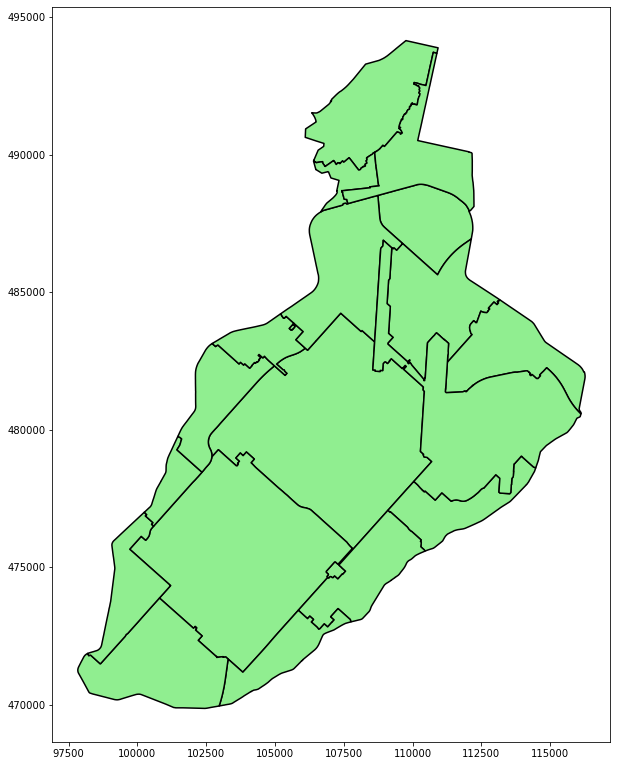

In [133]:
wijken_haarlemmermeer.boundary.plot(figsize=(10, 15), edgecolor='black', facecolor='lightgreen')

In [134]:
colors = {wijk: '#%02X%02X%02X' % (random.randint(0,255), random.randint(0,255), random.randint(0,255)) for wijk in wijken_haarlemmermeer['WK_CODE'].values}
colors

{'WK039401': '#CE6527',
 'WK039402': '#62FC4F',
 'WK039403': '#10B8FE',
 'WK039404': '#DC326F',
 'WK039405': '#B6D1DF',
 'WK039406': '#942BA1',
 'WK039407': '#8C7B02',
 'WK039408': '#C5C240',
 'WK039409': '#E98CCE',
 'WK039410': '#C4CB7A',
 'WK039411': '#2AD597',
 'WK039412': '#826E68',
 'WK039413': '#7BD87A',
 'WK039415': '#F0A959',
 'WK039416': '#229188',
 'WK039420': '#74652B',
 'WK039421': '#0F13D2',
 'WK039422': '#F9B1A9'}

<AxesSubplot:>

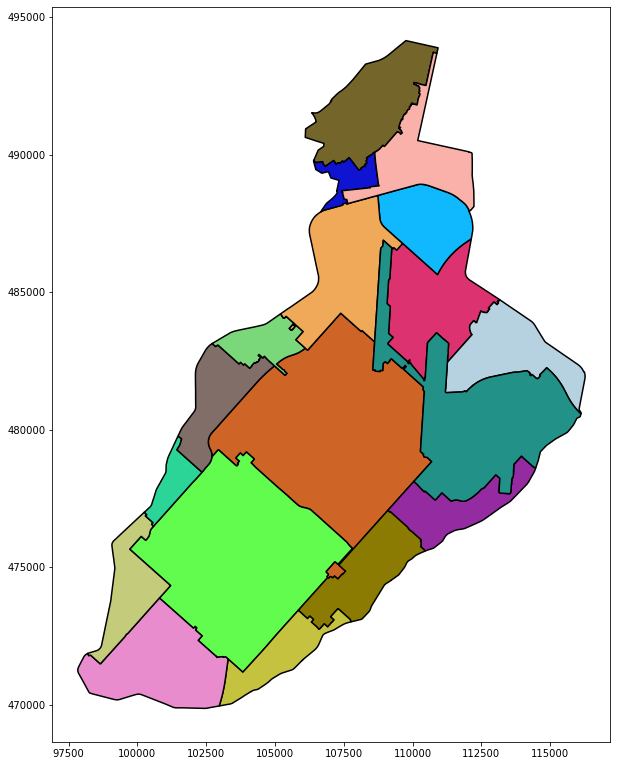

In [135]:
wijken_haarlemmermeer.boundary.plot(figsize=(10, 15), edgecolor='black', facecolor=list(colors.values()))

# Buurten

In [136]:
filename = 'WijkBuurtkaart_2020_v1/buurt_2020_v1.shp'
# filename = 'WijkBuurtkaart_2021_v0/SHP/CBS_buurten2021.shp'

buurten = geopandas.read_file(filename);

In [137]:
buurten.columns

Index(['BU_CODE', 'JRSTATCODE', 'BU_NAAM', 'WK_CODE', 'WK_NAAM', 'GM_CODE',
       'GM_NAAM', 'IND_WBI', 'H2O', 'POSTCODE', 'DEK_PERC', 'OAD', 'STED',
       'BEV_DICHTH', 'AANT_INW', 'AANT_MAN', 'AANT_VROUW', 'P_00_14_JR',
       'P_15_24_JR', 'P_25_44_JR', 'P_45_64_JR', 'P_65_EO_JR', 'P_ONGEHUWD',
       'P_GEHUWD', 'P_GESCHEID', 'P_VERWEDUW', 'AANTAL_HH', 'P_EENP_HH',
       'P_HH_Z_K', 'P_HH_M_K', 'GEM_HH_GR', 'P_WEST_AL', 'P_N_W_AL',
       'P_MAROKKO', 'P_ANT_ARU', 'P_SURINAM', 'P_TURKIJE', 'P_OVER_NW',
       'OPP_TOT', 'OPP_LAND', 'OPP_WATER', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [138]:
buurten_haarlemmermeer = buurten[buurten['GM_NAAM']=='Haarlemmermeer']
buurten_haarlemmermeer[['WK_NAAM', 'BU_NAAM']]

,WK_NAAM,BU_NAAM
4957,Hoofddorp,Hoofddorp West
4958,Hoofddorp,Hoofddorp Zuid
4959,Hoofddorp,Hoofddorp Graan voor Visch
4960,Hoofddorp,Hoofddorp Oost
4961,Hoofddorp,Hoofddorp Noord
...,...,...
5048,Haarlemmerliede,Haarlemmerliede
5049,Haarlemmerliede,Penningsveer
5050,Haarlemmerliede,Haarlemmerliede Omgeving
5051,Halfweg,Halfweg


<AxesSubplot:>

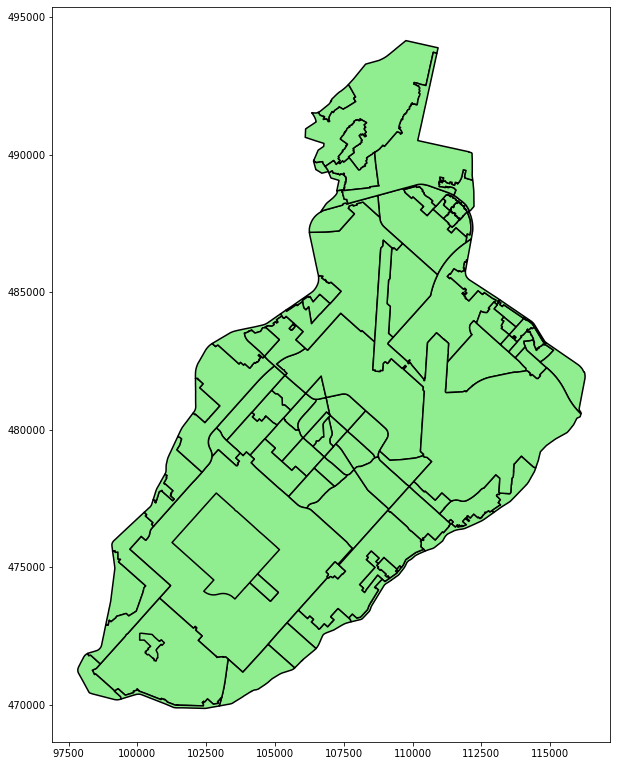

In [139]:
buurten_haarlemmermeer.boundary.plot(figsize=(10,15), edgecolor='black', facecolor='lightgreen')

<AxesSubplot:>

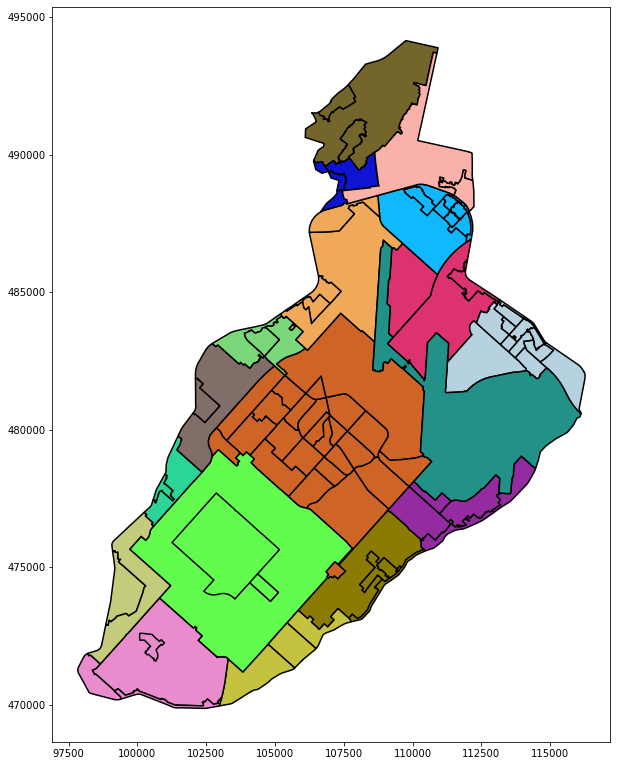

In [140]:

buurten_haarlemmermeer.boundary.plot(figsize=(10,15), edgecolor='black', facecolor=buurten_haarlemmermeer['WK_CODE'].map(colors))

In [142]:
buurten_haarlemmermeer['AANT_VROUW']

4957     635
4958    1685
4959    1695
4960    2610
4961    1775
        ... 
5048     110
5049      35
5050      10
5051    1245
5052      75
Name: AANT_VROUW, Length: 96, dtype: int64

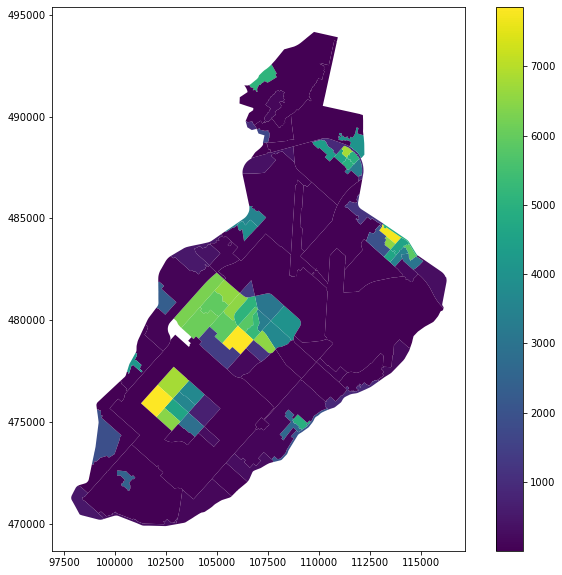

In [160]:
buurten_haarlemmermeer[buurten_haarlemmermeer['BEV_DICHTH']>0].plot(column='BEV_DICHTH', figsize=(11, 10), legend=True); 

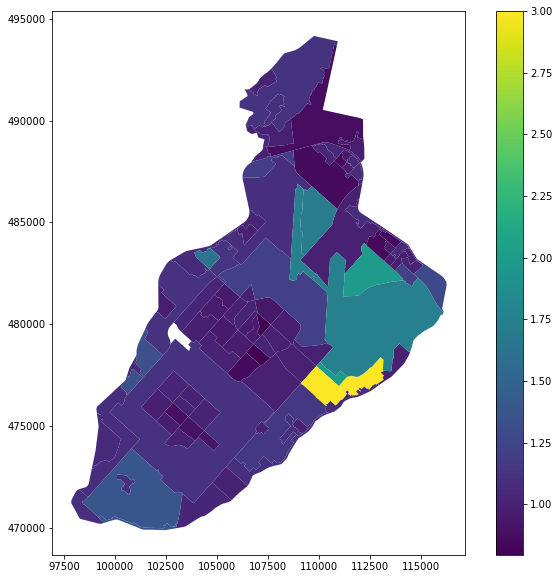

In [157]:
man_vrouw = buurten_haarlemmermeer.loc[(buurten_haarlemmermeer['AANT_VROUW'] > 0),
                                       ['AANT_INW','AANT_MAN','AANT_VROUW', 'geometry']]

man_vrouw['MAN_VROUW'] = man_vrouw['AANT_MAN'] / man_vrouw['AANT_VROUW']

man_vrouw.plot(column='MAN_VROUW', figsize=(11, 10), legend=True);      # cmap='OrRd'